In [65]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database and load data into pandas DataFrames
conn = sqlite3.connect('dicom_metadata.db')

# Load data from tables
dicom_metadata_df = pd.read_sql_query("SELECT * FROM dicom_metadata", conn)
patient_df = pd.read_sql_query("SELECT * FROM Patient", conn)
study_df = pd.read_sql_query("SELECT * FROM Study", conn)
series_df = pd.read_sql_query("SELECT * FROM Series", conn)

conn.close()

In [66]:
# Join the tables
merged_df = study_df.merge(patient_df, on="patient_id", how="left")
merged_df = merged_df.merge(series_df, on="study_instance_uid", how="left")

In [67]:
total_studies = study_df['study_instance_uid'].nunique()
print(f"Total number of studies: {total_studies}")

Total number of studies: 10


In [68]:
total_slices = series_df['series_number'].sum()
print(f"Total slices across all scans: {total_slices}")


Total slices across all scans: 6127848.0


In [69]:
avg_slices_per_study = series_df.groupby('series_instance_uid')['series_number'].sum().mean()
print(f"Average number of slices per study: {avg_slices_per_study:.2f}")


Average number of slices per study: 612784.80


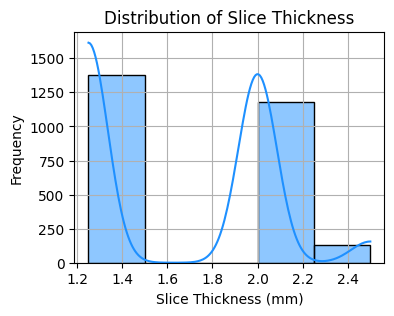

In [70]:
plt.figure(figsize=(4, 3))
sns.histplot(dicom_metadata_df['SliceThickness'], bins=5, kde=True, color='dodgerblue')
plt.title('Distribution of Slice Thickness')
plt.xlabel('Slice Thickness (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


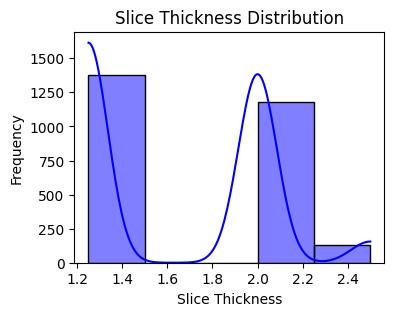

In [82]:
# Visualization: Slice Thickness Distribution
plt.figure(figsize=(4, 3))
sns.histplot(dicom_metadata_df['SliceThickness'], bins=5, kde=True, color='blue')
plt.title('Slice Thickness Distribution')
plt.xlabel('Slice Thickness')
plt.ylabel('Frequency')
plt.show()


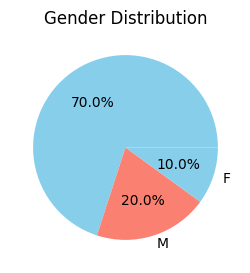

In [83]:

# Visualization 4: Gender Distribution in Patients
plt.figure(figsize=(3, 3))
gender_counts = merged_df['patient_sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


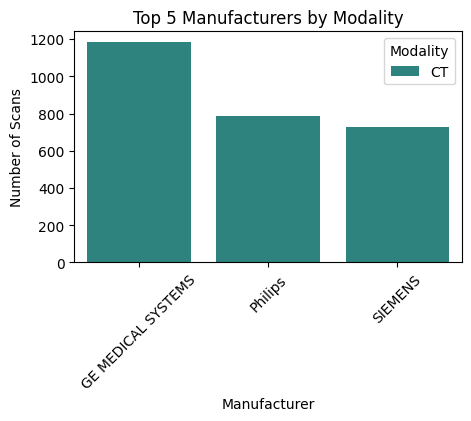

In [19]:
top_manufacturers = dicom_metadata_df.groupby(['Manufacturer', 'Modality']).size().reset_index(name='Count')
top_manufacturers = top_manufacturers.sort_values('Count', ascending=False).groupby('Modality').head(5)

plt.figure(figsize=(5, 3))
sns.barplot(data=top_manufacturers, x='Manufacturer', y='Count', hue='Modality', palette='viridis')
plt.title('Top 5 Manufacturers by Modality')
plt.xticks(rotation=45)
plt.ylabel('Number of Scans')
plt.show()


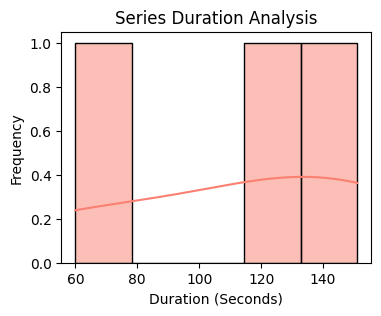

In [64]:
study_series_df = series_df.merge(study_df, on='study_instance_uid', how='left')
study_series_df['SeriesDuration'] = (
    pd.to_datetime(study_series_df['series_time'], format='%H%M%S', errors='coerce') -
    pd.to_datetime(study_series_df['study_time'], format='%H%M%S', errors='coerce')
).dt.total_seconds()

plt.figure(figsize=(4, 3))
sns.histplot(study_series_df['SeriesDuration'], bins=5, kde=True, color='salmon')
plt.title('Series Duration Analysis')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Frequency')
plt.show()


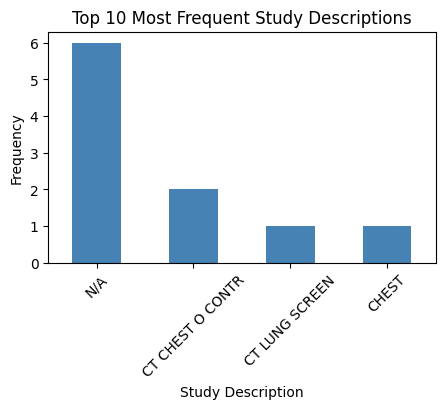

In [23]:
study_description_counts = study_df['study_description'].value_counts().head(10)

plt.figure(figsize=(5, 3))
study_description_counts.plot(kind='bar', color='steelblue')
plt.title('Top 10 Most Frequent Study Descriptions')
plt.xlabel('Study Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


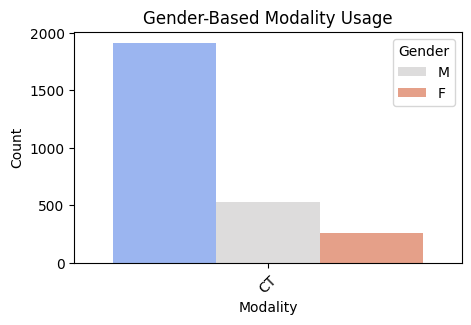

In [85]:
combined_df = dicom_metadata_df.merge(patient_df, left_on='PatientID', right_on='patient_id', how='left')

plt.figure(figsize=(5, 3))
sns.countplot(data=combined_df, x='Modality', hue='patient_sex', palette='coolwarm')
plt.title('Gender-Based Modality Usage')
plt.xlabel('Modality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.show()
